In [1]:
#Import Python Libraries
import numpy as np

import pandas as pd
import matplotlib as mpl
import seaborn as sns
from IPython.display import display, HTML



In [2]:
import re  
import nltk  
nltk.download('stopwords')  
from nltk.corpus import stopwords  

[nltk_data] Downloading package stopwords to C:\Users\Parth
[nltk_data]     Kaushik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv('pm.csv')

In [4]:
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [5]:
df.shape



(9093, 3)

In [6]:
df = df.dropna()

df.shape

(3291, 3)

In [7]:
import seaborn as sns

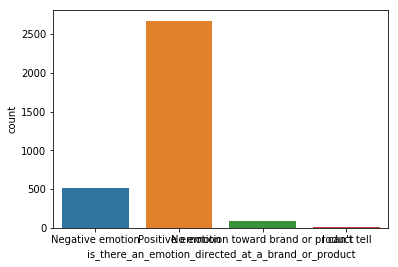

In [8]:
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df)

In [9]:
X = df.iloc[:,0].values  

print(X)

# X is an array of tweets
X.dtype


['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'
 "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.'
 ...
 'Diller says Google TV &quot;might be run over by the PlayStation and the Xbox, which are essentially ready today.&quot; #sxsw #diller'
 "I've always used Camera+ for my iPhone b/c it has an image stabilizer mode. Suggestions for an iPad cam app w/ same feature? #SXSW #SXSWi"
 'Ipad everywhere. #SXSW {link}']


dtype('O')

In [10]:
y=df.iloc[:,2].values


In [11]:
print(y)

['Negative emotion' 'Positive emotion' 'Positive emotion' ...
 'Negative emotion' 'Positive emotion' 'Positive emotion']


In [12]:
processed_tweets = []

In [13]:
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet)  
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
     # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()

    processed_tweets.append(processed_tweet)


In [14]:
processed_tweets


[' wesley83 have 3g iphone after 3 hrs tweeting at rise_austin it was dead need to upgrade plugin stations at sxsw ',
 ' jessedee know about fludapp awesome ipad iphone app that you ll likely appreciate for its design also they re giving free ts at sxsw',
 ' swonderlin can not wait for ipad 2 also they should sale them down at sxsw ',
 ' sxsw hope this year festival isn as crashy as this year iphone app sxsw',
 ' sxtxstate great stuff on fri sxsw marissa mayer google tim reilly tech books conferences amp matt mullenweg wordpress ',
 ' sxsw is just starting ctia is around the corner and googleio is only hop skip and jump from there good time to be an android fan',
 'beautifully smart and simple idea rt madebymany thenextweb wrote about our hollergram ipad app for sxsw http bit ly ieavob',
 'counting down the days to sxsw plus strong canadian dollar means stock up on apple gear',
 'excited to meet the samsungmobileus at sxsw so can show them my sprint galaxy still running android 2 1 fai

In [15]:
processed_tweet

'ipad everywhere sxsw link '

In [16]:
print(df.dtypes)

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object


In [17]:
cols=df.columns
print(cols)
#cols[0] prints a sring value at index 0 in cols
cols[0]

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')


'tweet_text'

In [18]:
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())

ColumnName, DataType, MissingValues
tweet_text , object , False
emotion_in_tweet_is_directed_at , object , False
is_there_an_emotion_directed_at_a_brand_or_product , object , False


In [19]:

from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000 , min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()

In [20]:
#print(X)
X.dtype
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 

In [22]:

from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=1)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [23]:
print(text_classifier)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


In [24]:
predictions = text_classifier.predict(X_test)
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))
 

[[  0   0   0   2]
 [  1  29   0  72]
 [  0   0   0  15]
 [  0  10   0 530]]
                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00         2
                  Negative emotion       0.74      0.28      0.41       102
No emotion toward brand or product       0.00      0.00      0.00        15
                  Positive emotion       0.86      0.98      0.91       540

                         micro avg       0.85      0.85      0.85       659
                         macro avg       0.40      0.32      0.33       659
                      weighted avg       0.82      0.85      0.81       659

0.8482549317147192


C:\Users\Parth Kaushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Parth Kaushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Parth Kaushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
